**IMPORTING THE RELEVANT PACKAGES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**IMPORTING THE DATASET**

In [2]:
Gold_dataset = pd.read_csv('/content/drive/MyDrive/gld_price_data.csv')
# loading the csv data to a pandas dataframe

**EXPLORING THE DATASET**

In [3]:
Gold_dataset.head()
# printing first five rows of the dataframe

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
Gold_dataset.tail()
# printing last five rows of the dataframe

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
Gold_dataset.shape
# printing the no. of rows and columns

(2290, 6)

In [6]:
Gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
Gold_dataset.isnull().sum()                
# we can see there is no null value 

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
Gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
# checking duplicate rows in the dataset
duplicate_rows = Gold_dataset[Gold_dataset.duplicated()]
duplicate_rows.shape
# we can see there is no duplicate rows

(0, 6)

**HEATMAP**

In [10]:
Correlation = Gold_dataset.corr()

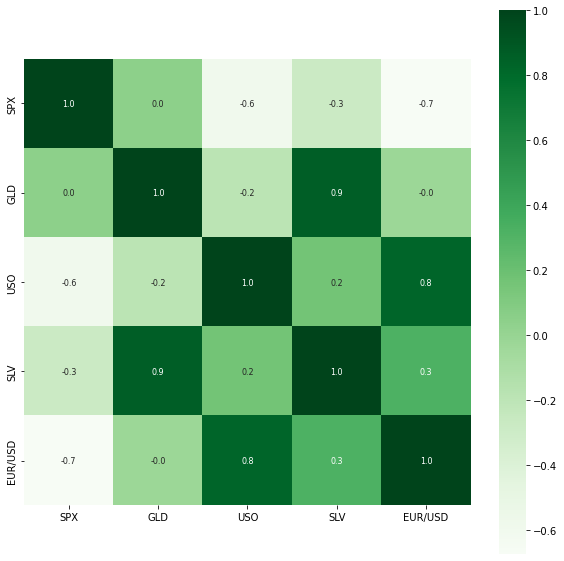

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(Correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap= "Greens")

From the heatmap we can see that the price of Gold is negatively correlated with USO and positively correlated with SLV & doesn't have proper correlation with SPX and EUR/USD

In [12]:
print(Correlation['GLD'])
# printing the correlation values of GLD

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


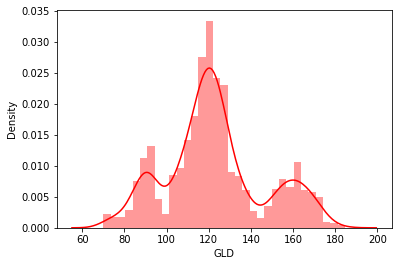

In [13]:
sns.distplot(Gold_dataset['GLD'], color='red')
# distribution of GLD price

**SPLITTING THE FEATURES AND TARGET**

In [14]:
X = Gold_dataset.drop(['Date', 'GLD'], axis=1)
Y = Gold_dataset['GLD']

In [15]:
print(X)


              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


**DATA IS SPLITTED INTO TRAINING AND TEST DATA**

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=3)

**MODEL TRAINING : RANDOM FOREST REGRESSOR**

In [18]:
Regressor = RandomForestRegressor(n_estimators= 100)

In [19]:
Regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

**MODEL EVALUATION**

In [20]:
test_data_prediction = Regressor.predict(X_test)

In [21]:
test_data_prediction

array([162.63890024, 127.56699894, 124.25179967, 119.40519894,
       125.97059895,  85.89299826, 171.68570205, 137.11950009,
       107.00990074, 133.04520185, 120.48669935, 124.91220034,
       143.20999817, 104.59210015,  80.86609893, 119.67489971,
       141.13589979,  90.35420034,  91.53959916, 128.30870198,
       125.8240994 , 147.75389969, 116.70070161, 152.85309934,
       129.52559891, 129.58480124, 118.05570106, 111.37080027,
       169.32920228, 157.39479841, 126.02520205, 154.06970154,
       127.02219942, 122.57109762, 116.35650145, 154.65489995,
       114.9928003 , 120.51420121, 103.97080217, 105.31960004,
       134.47119938,  85.78239938, 156.39610126, 121.16890012,
       122.33290068, 155.51730024, 120.43709977, 116.63960023,
       168.3570025 , 116.57240037, 138.28810168, 161.47349893,
       157.99650025, 153.57250015, 123.89690036, 117.13590011,
       166.58320044, 117.21319959, 165.60910063,  84.10629948,
       121.37559941, 122.15440008, 119.79540076, 171.86

In [22]:
Error_value = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", Error_value)

R squared error:  0.9858694015186557


In [23]:
Y_test = list(Y_test)

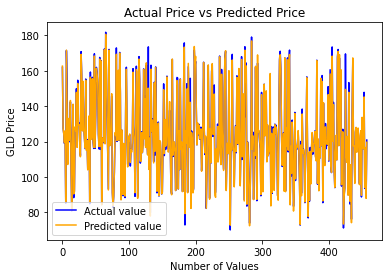

In [24]:
plt.plot(Y_test, color = 'blue', label = 'Actual value')
plt.plot(test_data_prediction, color = 'orange', label = 'Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

**TEST CASE**

In [25]:
input_data = (1254.25, 70.2527, 18.280001, 0.9232)
input_data_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_numpy_array.reshape(1,-1)
test_case_prediction = Regressor.predict(input_data_reshaped)
print("Gold price would be: ", test_case_prediction)

Gold price would be:  [94.11130001]
